In [6]:
%matplotlib inline

In [7]:
import numpy as np
import pandas as pd
from ggplot import *

In [8]:
csv_fn='/Shared/johnsonhj/HDNI/20151105_BABC_on_BrainWeb_data/ai_msles2/EVALUATIONS_BIASFIELD/statistics.csv'

In [9]:
DataFrame = pd.read_csv(csv_fn)

for field in ["modality","biasField","usePhysicalSpace","t2resolution","useKnn","usePurePlugs"]:
    DataFrame[field] = DataFrame[field].astype('category')

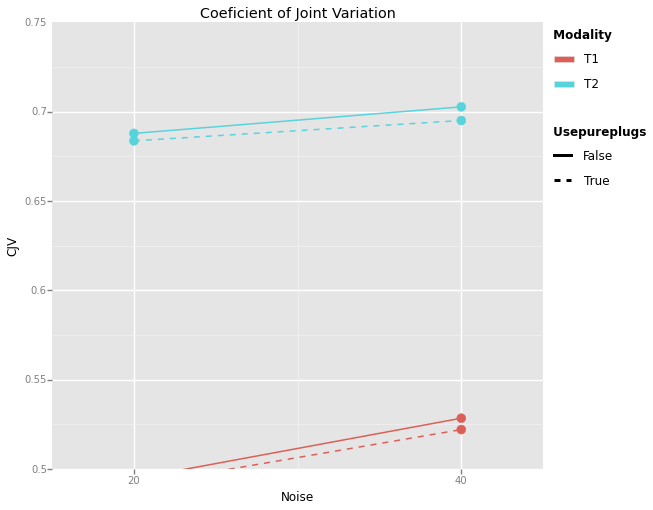

<ggplot: (295525941)>


In [33]:
df1 = DataFrame.loc[#(DataFrame.modality == 'T1') & # tissue region (GM or WM or CSF)
                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    (DataFrame.t2resolution == 1) & # if multimodality + resolution
                    (DataFrame.useKnn == True) # use knn or not
                    #(DataFrame.usePurePlugs == False) # use pure plugs or not
                    ]

#+ ylim(0.45, 0.75) \
p1 = ggplot(aes('biasField', 'CJV', linetype='usePurePlugs', color='modality'), data=df1 ) \
+ geom_point(alpha=1,size=80,) \
+ scale_x_continuous(breaks=(20,40)) \
+ ylim(0.5, 0.75) \
+ geom_line(size=1.5) \
+ labs(x='Noise', y='CJV', title='Coeficient of Joint Variation')
print(p1)